In [1]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
# root_proj = Path("/Users/yk/Documents/Projects/Pre-PhD")
# root_proj = Path("/Users/VERTPOM-UPJV/Documents/Banque_de_l'energie_V2/Data_prediction_K/Pre-PhD")
root_proj = Path("/Users/alesk/Documents/Git-repo/Pre-PhD")
if str(root_proj/"src") not in sys.path:
    sys.path.append(str(root_proj/"src"))

In [2]:
year = 2023
file_name = root_proj / f"DATA_SYSTEM_LIDL/DTS_LIDL_{year}.csv"
dts1 = pd.read_csv(file_name, sep=";")
dts1

,Date,PV,EV
0,1/01/2023 1:00,0.0,0.12
1,1/01/2023 1:15,0.0,0.08
2,1/01/2023 1:30,0.0,0.08
3,1/01/2023 1:45,0.0,0.12
4,1/01/2023 2:00,0.0,2.12
...,...,...,...
34940,31/12/2023 0:00,0.0,7.12
34941,31/12/2023 0:15,0.0,7.16
34942,31/12/2023 0:30,0.0,7.16
34943,31/12/2023 0:45,0.0,7.12


In [3]:
dts1["Date"] = pd.to_datetime(
    dts1["Date"],
    format="%d/%m/%Y %H:%M",
    dayfirst=True
)

dts1["Date"] = dts1["Date"].dt.tz_localize(
    "Europe/Paris",
    nonexistent="shift_forward",
    ambiguous="NaT"
)
dts1



,Date,PV,EV
0,2023-01-01 01:00:00+01:00,0.0,0.12
1,2023-01-01 01:15:00+01:00,0.0,0.08
2,2023-01-01 01:30:00+01:00,0.0,0.08
3,2023-01-01 01:45:00+01:00,0.0,0.12
4,2023-01-01 02:00:00+01:00,0.0,2.12
...,...,...,...
34940,2023-12-31 00:00:00+01:00,0.0,7.12
34941,2023-12-31 00:15:00+01:00,0.0,7.16
34942,2023-12-31 00:30:00+01:00,0.0,7.16
34943,2023-12-31 00:45:00+01:00,0.0,7.12


In [4]:
d=dts1.index[dts1['Date'] == '27/03/2023 1:00']
dts1.iloc[d[0]:d[0]+10]

,Date,PV,EV
8156,2023-03-27 01:00:00+02:00,0.0,11.12
8157,2023-03-27 01:15:00+02:00,0.0,11.12
8158,2023-03-27 01:30:00+02:00,0.0,11.12
8159,2023-03-27 01:45:00+02:00,0.0,10.92
8160,2023-03-27 02:00:00+02:00,0.0,10.56
8161,2023-03-27 02:15:00+02:00,0.0,13.76
8162,2023-03-27 02:30:00+02:00,0.0,9.96
8163,2023-03-27 02:45:00+02:00,0.0,9.60
8164,2023-03-27 03:00:00+02:00,0.0,9.36
8165,2023-03-27 03:15:00+02:00,0.0,9.16


In [5]:
temp = pd.read_csv(root_proj / f"DATA_SYSTEM_LIDL/Temperature/orly_{year}_hourly_weather.csv", sep=",")
# temp["Date"]= pd.to_datetime(temp["time"], utc=True)]}
temp["Date"] = pd.to_datetime(temp["time"], utc=True).dt.tz_convert("Europe/Paris")
temp
# temp_wanted = temp[temp["Date"] <= pd.Timestamp("2022-12-31 01:00:00",tz="Etc/GMT-1")]
# temp

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,Date
0,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0,2023-01-01 01:00:00+01:00
1,2023-01-01 02:00:00+01:00,14.4,5.7,56.0,0.0,NaN,210.0,25.9,40.8,1014.7,NaN,3.0,2023-01-01 02:00:00+01:00
2,2023-01-01 03:00:00+01:00,14.4,6.5,59.0,0.0,NaN,210.0,22.3,37.0,1014.9,NaN,3.0,2023-01-01 03:00:00+01:00
3,2023-01-01 04:00:00+01:00,14.2,6.8,61.0,0.0,0.0,210.0,29.5,50.0,1015.7,NaN,3.0,2023-01-01 04:00:00+01:00
4,2023-01-01 05:00:00+01:00,13.9,7.4,65.0,0.0,NaN,210.0,22.3,44.5,1015.9,NaN,4.0,2023-01-01 05:00:00+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31 20:00:00+01:00,8.1,3.7,74.0,0.0,NaN,230.0,31.7,38.9,1005.0,NaN,3.0,2023-12-31 20:00:00+01:00
8756,2023-12-31 21:00:00+01:00,7.5,4.3,80.0,0.0,NaN,230.0,24.1,38.9,1005.9,NaN,3.0,2023-12-31 21:00:00+01:00
8757,2023-12-31 22:00:00+01:00,7.4,4.5,82.0,0.0,0.0,220.0,20.5,44.0,1006.4,NaN,2.0,2023-12-31 22:00:00+01:00
8758,2023-12-31 23:00:00+01:00,7.2,4.5,83.0,0.0,NaN,220.0,22.3,42.6,1006.6,NaN,2.0,2023-12-31 23:00:00+01:00


In [6]:
dts1 = dts1.set_index("Date")
    

In [8]:
temp_wanted = temp[temp["Date"] <= pd.Timestamp("2023-12-31 01:00:00",tz="Etc/GMT-1")]
temp_wanted = temp_wanted.set_index("Date")
dts_t = temp_wanted.resample("15min").ffill()
dts_t


,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
Date,,,,,,,,,,,,
2023-01-01 01:00:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 01:15:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 01:30:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 01:45:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 02:00:00+01:00,2023-01-01 02:00:00+01:00,14.4,5.7,56.0,0.0,NaN,210.0,25.9,40.8,1014.7,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 00:00:00+01:00,2023-12-31 00:00:00+01:00,9.4,6.7,83.0,0.0,NaN,180.0,20.5,33.3,1005.9,NaN,4.0
2023-12-31 00:15:00+01:00,2023-12-31 00:00:00+01:00,9.4,6.7,83.0,0.0,NaN,180.0,20.5,33.3,1005.9,NaN,4.0
2023-12-31 00:30:00+01:00,2023-12-31 00:00:00+01:00,9.4,6.7,83.0,0.0,NaN,180.0,20.5,33.3,1005.9,NaN,4.0


In [9]:
dts_t = dts_t.reindex(dts1.index)
dts_t


,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
Date,,,,,,,,,,,,
2023-01-01 01:00:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 01:15:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 01:30:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 01:45:00+01:00,2023-01-01 01:00:00+01:00,14.2,5.0,54.0,0.0,0.0,210.0,25.9,44.0,1014.6,NaN,3.0
2023-01-01 02:00:00+01:00,2023-01-01 02:00:00+01:00,14.4,5.7,56.0,0.0,NaN,210.0,25.9,40.8,1014.7,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 00:00:00+01:00,2023-12-31 00:00:00+01:00,9.4,6.7,83.0,0.0,NaN,180.0,20.5,33.3,1005.9,NaN,4.0
2023-12-31 00:15:00+01:00,2023-12-31 00:00:00+01:00,9.4,6.7,83.0,0.0,NaN,180.0,20.5,33.3,1005.9,NaN,4.0
2023-12-31 00:30:00+01:00,2023-12-31 00:00:00+01:00,9.4,6.7,83.0,0.0,NaN,180.0,20.5,33.3,1005.9,NaN,4.0


In [10]:
dts = dts1.join(dts_t.temp)
dts


,PV,EV,temp
Date,,,
2023-01-01 01:00:00+01:00,0.0,0.12,14.2
2023-01-01 01:15:00+01:00,0.0,0.08,14.2
2023-01-01 01:30:00+01:00,0.0,0.08,14.2
2023-01-01 01:45:00+01:00,0.0,0.12,14.2
2023-01-01 02:00:00+01:00,0.0,2.12,14.4
...,...,...,...
2023-12-31 00:00:00+01:00,0.0,7.12,9.4
2023-12-31 00:15:00+01:00,0.0,7.16,9.4
2023-12-31 00:30:00+01:00,0.0,7.16,9.4


In [11]:
dts = dts.reset_index(drop=False)
dts


,Date,PV,EV,temp
0,2023-01-01 01:00:00+01:00,0.0,0.12,14.2
1,2023-01-01 01:15:00+01:00,0.0,0.08,14.2
2,2023-01-01 01:30:00+01:00,0.0,0.08,14.2
3,2023-01-01 01:45:00+01:00,0.0,0.12,14.2
4,2023-01-01 02:00:00+01:00,0.0,2.12,14.4
...,...,...,...,...
34996,2023-12-31 00:00:00+01:00,0.0,7.12,9.4
34997,2023-12-31 00:15:00+01:00,0.0,7.16,9.4
34998,2023-12-31 00:30:00+01:00,0.0,7.16,9.4
34999,2023-12-31 00:45:00+01:00,0.0,7.12,9.4


In [12]:
dts['hour'] = dts['Date'].dt.hour
# dts['minute'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.minute
dts['dayofyear'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.dayofyear
dts['month'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.month
dts['dayofweek'] = pd.to_datetime(dts['Date'],dayfirst=True).dt.dayofweek
dts['hour_sin'] = np.sin(2*np.pi*dts['hour']/24)
dts['hour_cos'] = np.cos(2*np.pi*dts['hour']/24)
dts['doy_sin'] = np.sin(2*np.pi*dts['dayofyear']/365)
dts['doy_cos'] = np.cos(2*np.pi*dts['dayofyear']/365)
dts['dow_sin'] = np.sin(2*np.pi*dts['dayofweek']/7)
dts['dow_cos'] = np.cos(2*np.pi*dts['dayofweek']/7)

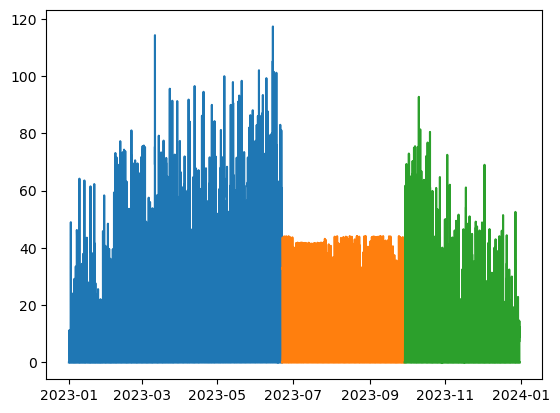

In [13]:
initial = dts.index[dts['Date'] == pd.Timestamp('2023-06-22 01:00:00', tz='Europe/Paris')][0]
final = dts.index[dts['Date'] == pd.Timestamp('2023-09-29 01:00:00', tz='Europe/Paris')][0]

df_train = dts.iloc[:initial]
df_test = dts.iloc[initial:final]
df_after = dts.iloc[final:]
plt.plot(df_train.Date.dt.tz_localize(None), df_train['PV'], label='Train')
plt.plot(df_test.Date.dt.tz_localize(None), df_test['PV'], label='Test')
plt.plot(df_after.Date.dt.tz_localize(None), df_after['PV'], label='After')

In [17]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
days = 30
forecaster = ForecasterRecursive(
    # regressor = XGBRegressor(n_estimators=460, learning_rate=0.01, random_state=42),
        # regressor = LGBMRegressor(random_state=15926, verbose=-1),
    regressor = RandomForestRegressor(random_state=42),
    lags = int((60/15)*24*days), # use previous two month
    window_features = RollingFeatures(stats=['max','std'], window_sizes=int((60/15)*24))
)

C:\Users\alesk\AppData\Local\Temp\ipykernel_8684\171639161.py:7: FutureWarning: The `regressor` argument is deprecated and will be removed in a future version. Please use `estimator` instead.
  forecaster = ForecasterRecursive(


In [18]:
import joblib as jb
import json

output_dir = root_proj / "checkpoints" / "15m"/ "{year}" / "pv_30d_rf_2023_lim_temp_M"

if not (output_dir / "log.json").is_file(): # first train
    output_dir.mkdir(parents=True, exist_ok=True)
    # training
    forecaster.fit(y=df_train['PV'],exog=df_train[['temp','month']], store_in_sample_residuals=True)
    # residuals = forecaster.in_sample_residuals  # 查看训练残差
    # save model
    jb.dump(forecaster, output_dir/"model.joblib")
    # log
    log = {
        "metadata": {
            "description": "recursive rf",
            "lags": int(forecaster.lags[-1]),
            "window_features": {
                "type": forecaster.window_features[0].__class__.__name__ ,
                "stats": forecaster.window_features[0].stats,
                "window_size": forecaster.window_features[0].window_sizes
            },
            "freq": "15min"
        },
        # "residuals": forecaster.in_sample_residuals
    }
    # save log
    with open(output_dir/"log.json", "w") as f:
        json.dump(log, f, indent=2)
    print("End of training")
else:
    # 加载模型 | load model
    forecaster = jb.load(output_dir/"model.joblib")
    # load log
    with open(output_dir/"log.json", "r") as f:
        log = json.load(f)
    print("Loaded")

End of training


In [19]:
yhat_test = forecaster.predict(steps=len(df_test), exog=df_test[['temp','month']])

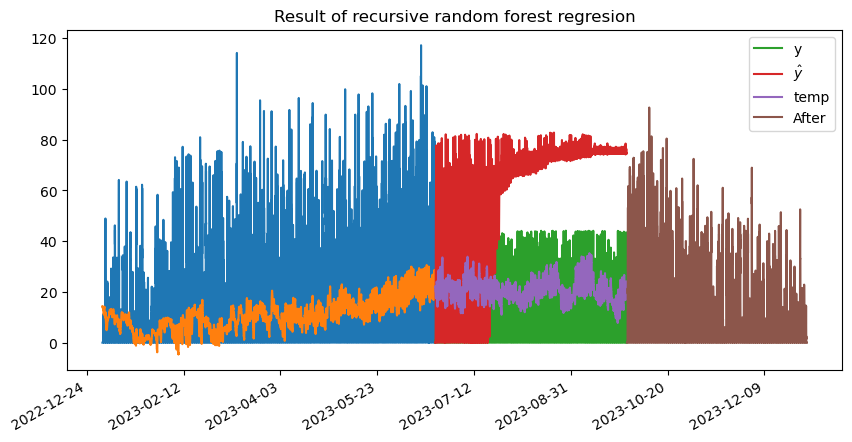

In [20]:
# Save and display the plot
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
ax.plot(df_train['Date'],df_train['PV'])
ax.plot(df_train['Date'],df_train['temp'])
ax.plot(df_test['Date'], df_test['PV'], label='y')
ax.plot(df_test['Date'], yhat_test, label=r'$\hat{y}$')
ax.plot(df_test['Date'],df_test['temp'], label='temp')
ax.plot(df_after.Date.dt.tz_localize(None), df_after['PV'], label='After')

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# optional: minor ticks every 6 hours
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))

ax.legend()

fig.autofmt_xdate() # for rotation
fig.savefig(output_dir / "prediction_test.png", dpi=300, bbox_inches='tight')
plt.show()

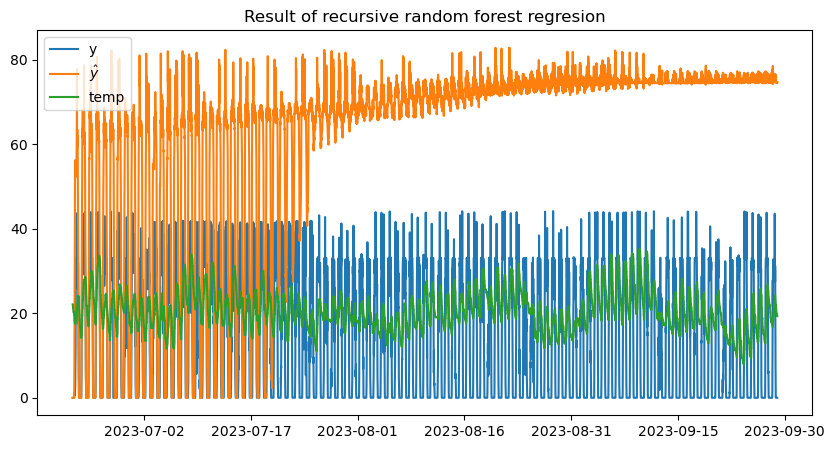

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Result of recursive random forest regresion")
# ax.plot(df_train['Date'],df_train['PV'])
# ax.plot(df_train['Date'],df_train['temp'])
ax.plot(df_test['Date'], df_test['PV'], label='y')
ax.plot(df_test['Date'], yhat_test, label=r'$\hat{y}$')
ax.plot(df_test['Date'],df_test['temp'], label='temp')
# ax.plot(df_after['Date'],df_after['PV'])

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# optional: minor ticks every 6 hours
# ax.xaxis.set_minor_locator(mdates.HourLocator(interval=6))

ax.legend()